In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# PART (a) SAMPLE OF 25

In [ ]:
np.random.seed(123)

sample = df.sample(n=25, random_state=123)

In [ ]:
# Population stats
pop_glucose_mean = df['Glucose'].mean()
pop_glucose_max  = df['Glucose'].max()

In [ ]:
# Sample stats
sample_glucose_mean = sample['Glucose'].mean()
sample_glucose_max  = sample['Glucose'].max()

In [ ]:
print("Population Glucose mean:", pop_glucose_mean)
print("Sample Glucose mean    :", sample_glucose_mean)

Population Glucose mean: 120.89453125
Sample Glucose mean    : 130.36


In [ ]:
print("Population Glucose max :", pop_glucose_max)
print("Sample Glucose max     :", sample_glucose_max)


Population Glucose max : 199
Sample Glucose max     : 197


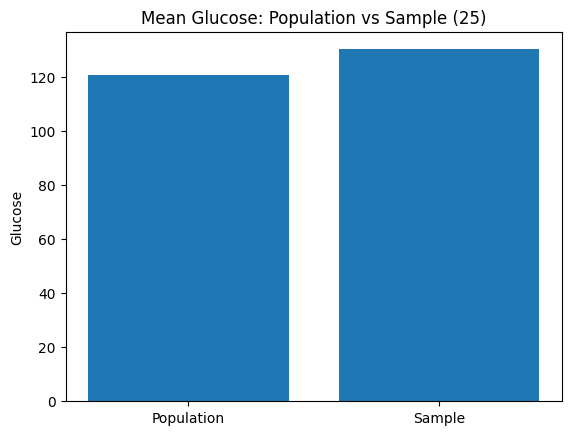

In [ ]:
# Plot mean comparison
plt.figure()
plt.bar(['Population','Sample'], [pop_glucose_mean, sample_glucose_mean])
plt.ylabel("Glucose")
plt.title("Mean Glucose: Population vs Sample (25)")
plt.show()

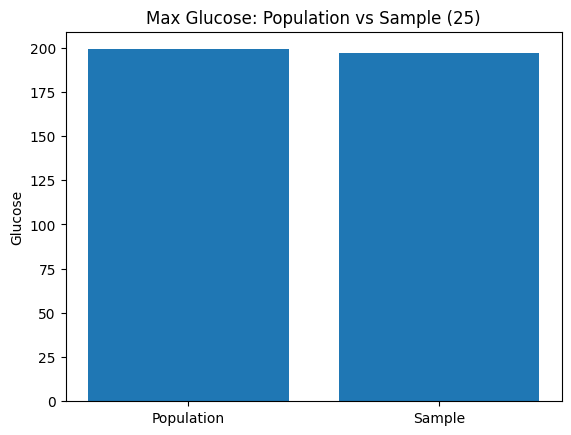

In [ ]:
# Plot max comparison
plt.figure()
plt.bar(['Population','Sample'], [pop_glucose_max, sample_glucose_max])
plt.ylabel("Glucose")
plt.title("Max Glucose: Population vs Sample (25)")
plt.show()

# PART (b) 98th percentile of BMI

In [ ]:
pop_bmi_p98 = df['BMI'].quantile(0.98)
sample_bmi_p98 = sample['BMI'].quantile(0.98)

In [ ]:
print("Population BMI 98th percentile:", pop_bmi_p98)
print("Sample BMI 98th percentile    :", sample_bmi_p98)

Population BMI 98th percentile: 47.52599999999996
Sample BMI 98th percentile    : 45.263999999999996


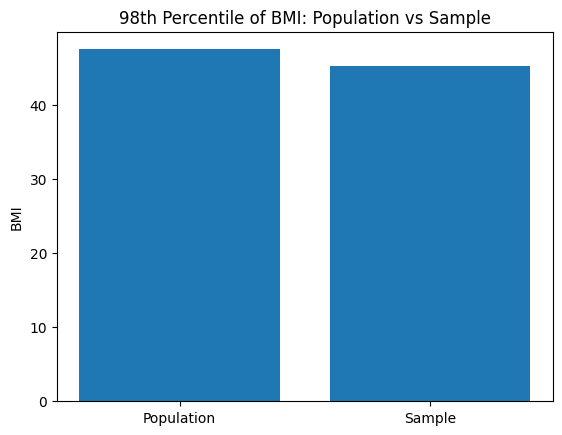

In [ ]:
plt.figure()
plt.bar(['Population','Sample'], [pop_bmi_p98, sample_bmi_p98])
plt.ylabel("BMI")
plt.title("98th Percentile of BMI: Population vs Sample")
plt.show()

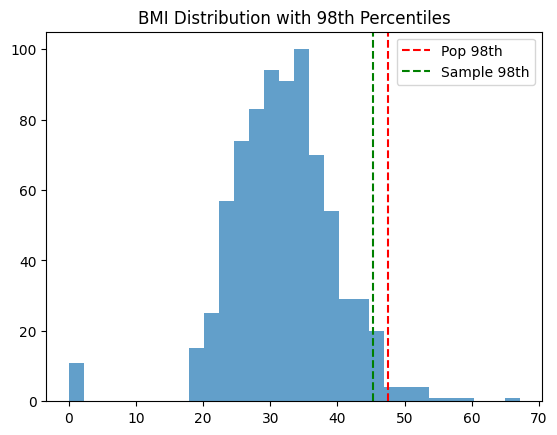

In [ ]:
# histogram
plt.figure()
plt.hist(df['BMI'], bins=30, alpha=0.7)
plt.axvline(pop_bmi_p98, color='red', linestyle='--', label='Pop 98th')
plt.axvline(sample_bmi_p98, color='green', linestyle='--', label='Sample 98th')
plt.title("BMI Distribution with 98th Percentiles")
plt.legend()
plt.show()

# PART (c) BOOTSTRAP (500 samples of n=150)


In [ ]:
bp = df['BloodPressure']


In [ ]:
# True population stats
pop_bp_mean = bp.mean()
pop_bp_std  = bp.std(ddof=1)
pop_bp_p98  = bp.quantile(0.98)

In [ ]:
print("Population BP mean:", pop_bp_mean)
print("Population BP std :", pop_bp_std)
print("Population BP 98th:", pop_bp_p98)

Population BP mean: 69.10546875
Population BP std : 19.355807170644777
Population BP 98th: 99.31999999999994


In [ ]:
# Bootstrap
n_boot = 500
sample_size = 150
boot_means = []
boot_stds  = []
boot_p98   = []

In [ ]:
for i in range(n_boot):
    samp = bp.sample(n=sample_size, replace=True)
    boot_means.append(samp.mean())
    boot_stds.append(samp.std(ddof=1))
    boot_p98.append(samp.quantile(0.98))

boot_means = np.array(boot_means)
boot_stds  = np.array(boot_stds)
boot_p98   = np.array(boot_p98)

In [ ]:
# Averages of bootstrap stats
print("\nBootstrap Avg Mean:", boot_means.mean())
print("Bootstrap Avg Std :", boot_stds.mean())
print("Bootstrap Avg 98th:", boot_p98.mean())


Bootstrap Avg Mean: 69.01145333333334
Bootstrap Avg Std : 19.525254334216513
Bootstrap Avg 98th: 98.19676000000003


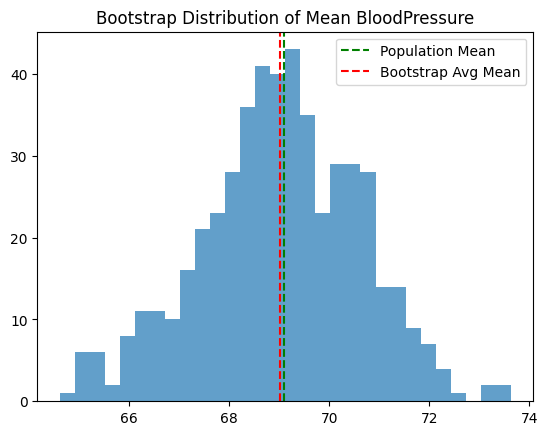

In [ ]:
# PLOTS
# Mean
plt.figure()
plt.hist(boot_means, bins=30, alpha=0.7)
plt.axvline(pop_bp_mean, color='green', linestyle='--', label='Population Mean')
plt.axvline(boot_means.mean(), color='red', linestyle='--', label='Bootstrap Avg Mean')
plt.title("Bootstrap Distribution of Mean BloodPressure")
plt.legend()
plt.show()

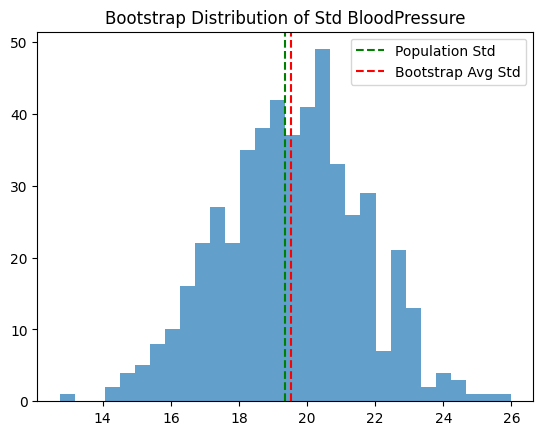

In [ ]:
# Std
plt.figure()
plt.hist(boot_stds, bins=30, alpha=0.7)
plt.axvline(pop_bp_std, color='green', linestyle='--', label='Population Std')
plt.axvline(boot_stds.mean(), color='red', linestyle='--', label='Bootstrap Avg Std')
plt.title("Bootstrap Distribution of Std BloodPressure")
plt.legend()
plt.show()


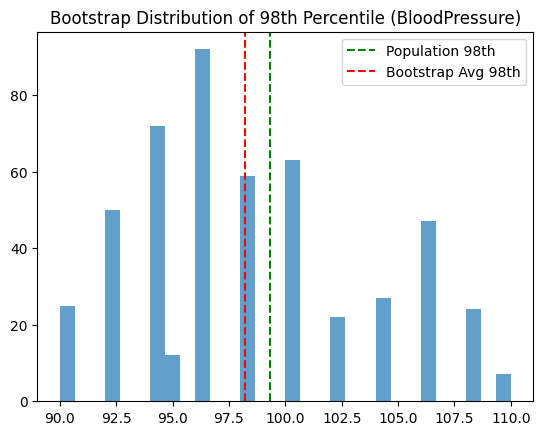

In [ ]:
# 98th percentile
plt.figure()
plt.hist(boot_p98, bins=30, alpha=0.7)
plt.axvline(pop_bp_p98, color='green', linestyle='--', label='Population 98th')
plt.axvline(boot_p98.mean(), color='red', linestyle='--', label='Bootstrap Avg 98th')
plt.title("Bootstrap Distribution of 98th Percentile (BloodPressure)")
plt.legend()
plt.show()


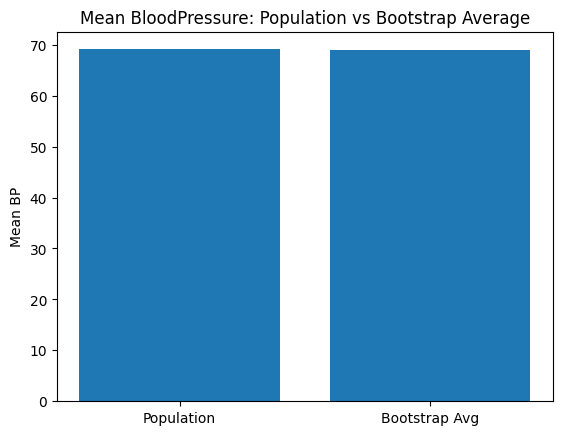

In [ ]:
# BAR CHARTS: Population vs Bootstrap Avg

# Mean comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_mean, boot_means.mean()])
plt.title("Mean BloodPressure: Population vs Bootstrap Average")
plt.ylabel("Mean BP")
plt.show()

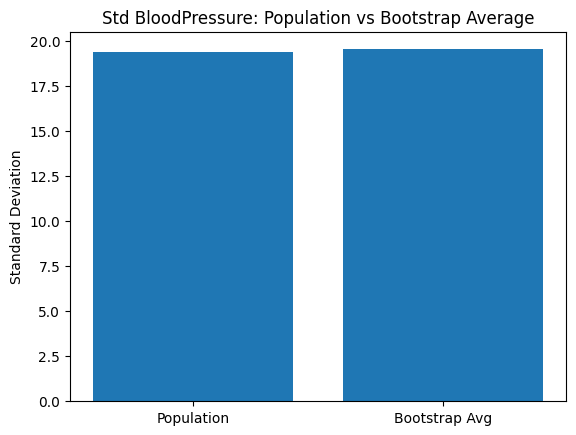

In [ ]:
# Standard deviation comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_std, boot_stds.mean()])
plt.title("Std BloodPressure: Population vs Bootstrap Average")
plt.ylabel("Standard Deviation")
plt.show()

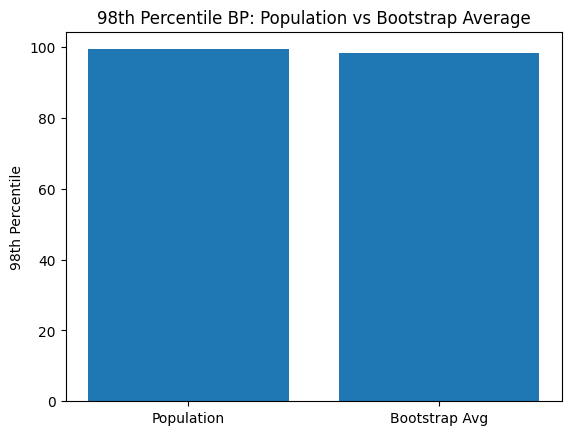

In [ ]:
# 98th percentile comparison
plt.figure()
plt.bar(['Population', 'Bootstrap Avg'],
        [pop_bp_p98, boot_p98.mean()])
plt.title("98th Percentile BP: Population vs Bootstrap Average")
plt.ylabel("98th Percentile")
plt.show()